<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SpaceVector_SPWM_AveragingForFullCycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Space Vector Averaging Switching Period by Switching Period</h1></b>

Dr. Bingsen Wang

7/17/2024
</center>

#Space Vector

The space vector is complex variable defined as
$$\underline f = {2\over3}\left(f_a + f_be^{j\frac{2\pi}{3}} + f_ce^{j\frac{4\pi}{3}}\right)\tag{1}$$
where $f_a,f_b,f_c$ are the three-phase variables. In electrical systems, the variable $f$ can be voltage $v$, current $i$, or flux linkage $\lambda$. In power electronics systems, the variable $f$ can be the modulation function or switching function.

#Python Code
The Python code illustrates the space vector averaged over a switching period.

0
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
0


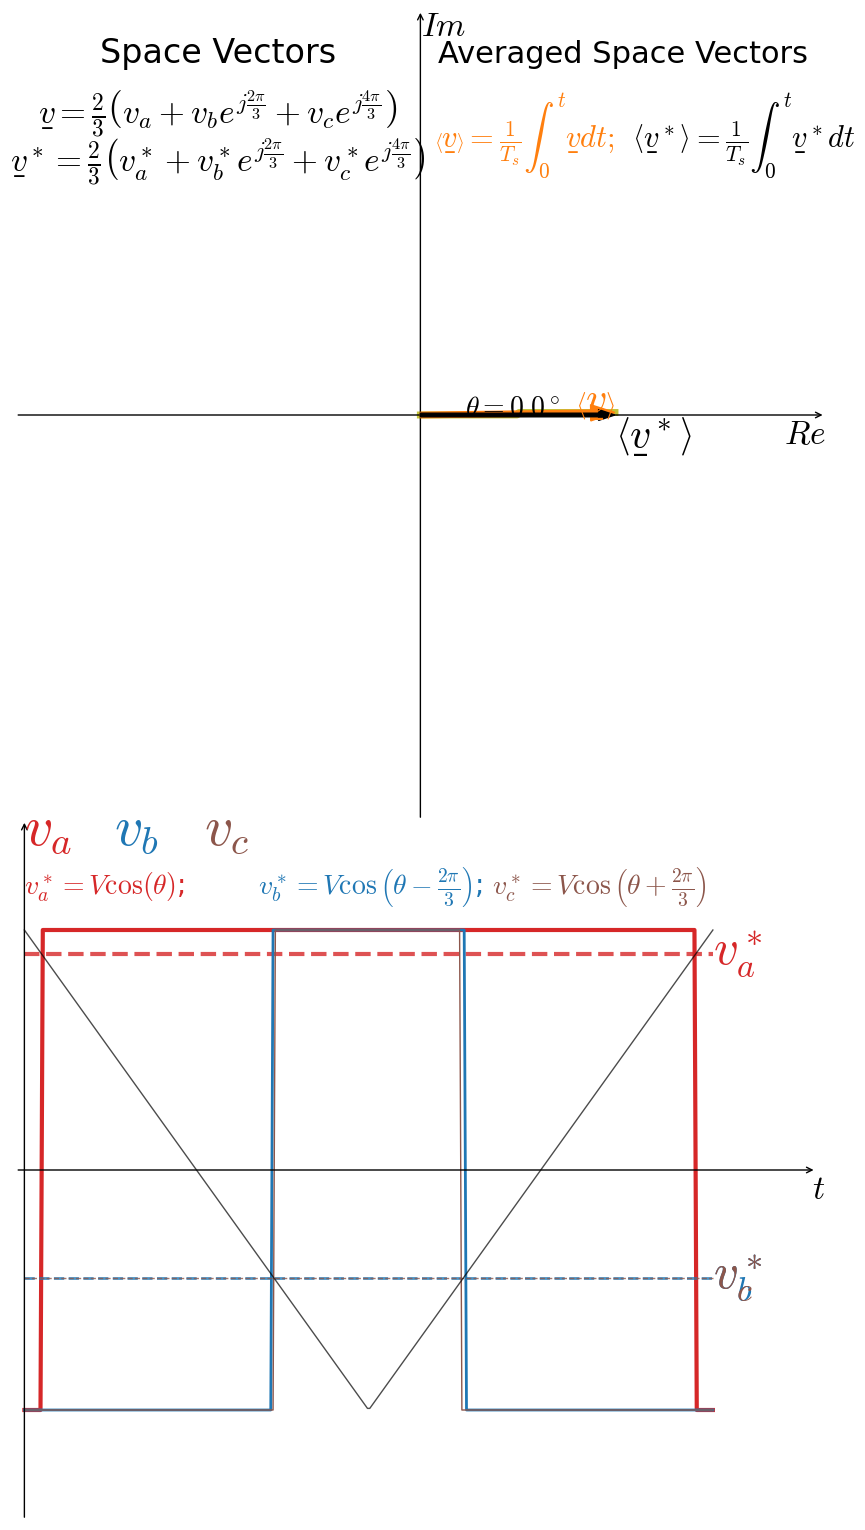

In [56]:
import matplotlib
from os import linesep
from scipy import integrate
import numpy as np
from numpy import linspace,cos,sin,arccos,pi,exp
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc,rcParams
rc('animation', html='jshtml')
plt.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

#carrier
def carrier(t,fs):
  return -2/pi*arccos(cos(2*pi*fs*t))+1

#modulation functions
def mf_abc(t,f,MI,theta):
  mf=[]
  for i in range(3):
    mf.append(MI*cos(2*pi*f*t+theta-i*2*pi/3))
  return np.array(mf)

#modulation functions space vector
def mf_sv(t,f,MI,theta):
  mf=0
  for i in range(3):
    mf += MI*cos(2*pi*f*t+theta-i*2*pi/3)*exp(1j*i*2*pi/3)*2/3
  return np.array(mf)

#PWM voltage waveforms
def vac_abc(t,V,f,MI,theta,fs):
  vac=[]
  for i in range(3):
    vac.append(V*(2*np.heaviside(mf_abc(t,f,MI,theta)[i]-carrier(t,fs),0)-1))
  return np.array(vac)

#integration of space vector of pwm
def sv_modulation_dt(t1,t2,f,MI,theta):
  sv=0
  for i in range(3):
    v_dt = integrate.fixed_quad(lambda x: mf_abc(x,f,MI,theta)[i],t1,t2)
    sv += 2/3*v_dt[0]*exp(1j*i*2*pi/3)
  return sv

#integration of space vector of pwm
def sv_pwm_dt(t1,t2,V,f,MI,theta,fs):
  sv=0
  for i in range(3):
    v_dt = integrate.fixed_quad(lambda x: vac_abc(x,V,f,MI,theta,fs)[i],t1,t2)
    sv += 2/3*v_dt[0]*exp(1j*i*2*pi/3)
  return sv

#parameters
Ns = 72 #number of switching periods per fundamental cycle
f = 1/(2*pi) # fundamental frequency in Hz
T = 1/f #fundamental period
fs = 240*f #switching frequency
Ts = 1/fs #switching period

V = 2.4 #voltage
MI=0.9 #modulation index
theta=2*pi/Ns*linspace(0,Ns,Ns+1) #phase angle
sv_ref=V*mf_sv(0,0,MI,theta)#trajectory of the reference space vector
# print(sv_ref)
xymax = 4.5
clst=['tab:red','tab:blue','tab:brown','tab:green','tab:olive','tab:orange','k','w'] #colors light bg
# clst=['lightskyblue','violet','yellow','lightgreen','tab:olive','tab:orange','w',(.1,.1,.1)] #colors dark bg
fig = plt.figure(figsize=(9,16),facecolor=clst[-1])
fig.tight_layout()
ax=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc
ax0=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc for animated parts
ax1=fig.add_axes((0.05,0,.9,7/16),xlim=[-.1,2*xymax-.1], ylim=[-xymax*7/9,xymax*7/9],fc='none') #no fc
ax.axis('off') #turn off axis frames
ax1.axis('off') #turn off axis frames
ax.annotate("", (xymax, 0), (-xymax, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis for space vector
ax.annotate("", (0,xymax), (0,-xymax),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis for space vector
ax1.annotate("", (2*xymax-.2, 0), (-.1, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis for voltages
ax1.annotate("", (0,xymax*7/9), (0,-xymax*7/9),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis for voltages
ax.text(xymax,-.03,'$Re$',size=24,va='top',ha='right',color=clst[-2]) #x-axis label
ax.text(0.01,xymax,'$Im$',size=24,va='top',color=clst[-2]) #y label
ax.text(-xymax*.5,xymax*.87,'Space Vectors',size=24,ha='center',color=clst[-2]) #space vector label
ax.text(-xymax*.5,xymax*.72,r'$v\underbar = \frac{2}{3}\left(v_a + v_b e^{j\frac{2\pi}{3}}+ v_c e^{j\frac{4\pi}{3}}\right)$',
        size=24,ha='center',color=clst[-2])
ax.text(-xymax*.5,xymax*.6,r'${v\underbar}^* = \frac{2}{3}\left(v_a^* + v_b^* e^{j\frac{2\pi}{3}}+ v_c^* e^{j\frac{4\pi}{3}}\right)$',
        size=24,ha='center',color=clst[-2])
ax.text(xymax*.5,xymax*.87,'Averaged Space Vectors',size=22,ha='center',color=clst[-2]) #space vector label
ax.text(xymax*.5,xymax*.66,r'$\left<v\underbar\right> = \frac{1}{T_s}\int_0^t v\underbar dt;$ ',
        size=22,ha='right',color=clst[5])
ax.text(xymax*.5,xymax*.66,r' $\left<v\underbar^*\right> = \frac{1}{T_s}\int_0^t v\underbar^* dt$',
        size=22,ha='left',color=clst[-2])


lines = [] #array containing all the line plots
lines.append(ax.plot([], [], '-', lw=5, color=clst[4],alpha=.9)[0]) #flux linkage trajectory
lines.append(ax.plot([], [], '--', lw=2, color=clst[-2],alpha=.9)[0]) #ref vector trajectory
for i in range(3):
  lines.append(ax1.plot([], [], '-', lw=3-i, color=clst[i],alpha=1)[0]) #v_a,v_b,v_c PWM
  lines.append(ax1.plot([], [], '--', lw=3-i, color=clst[i],alpha=.8)[0]) #v_a,v_b,v_c modulation
lines.append(ax1.plot([], [], '-', lw=1, color=clst[-2], alpha=.7)[0]) #carrier
labels_vabc = [r'$v_a$',r'$v_b$',r'$v_c$']
labels_vabc_star = [r'$v_a^*$',r'$v_b^*$',r'$v_c^*$']
labels_vabc_star1 = [r'$v_a^* = V\cos(\theta)$;',
                     r'$v_b^*=V\cos\left(\theta-\frac{2\pi}{3}\right)$;',
                     r'$v_c^*=V\cos\left(\theta+\frac{2\pi}{3}\right)$']
text_vabc_star =[]
for i in range(3):
  ax1.text(i,xymax*6.5/9,labels_vabc[i],size=40,color=clst[i]) #vabc
  ax1.text(i*2.6,xymax*5.5/9,labels_vabc_star1[i],size=20,color=clst[i]) #vabc
  text_vabc_star.append(ax1.text(0,0,labels_vabc_star[i],
                                 size=35,va='center',color=clst[i])) #vabc_star

ax1.text(2*xymax-.1,-.03,r'$t$',size=24,va='top',ha='right', color=clst[-2]) #x-axis label
text_theta = ax.text(-.5*xymax,-.5*xymax,'',size=35,va='center',ha='center', color=clst[-2])

def drawVectors(ax,xymax,lambda_sv,lambda_star_sv,theta,clst):
  theta_l = np.angle(lambda_sv)
  ax.clear()
  ax.set_xlim([-xymax,xymax])
  ax.set_ylim([-xymax,xymax])
  ax.axis('off')
  arr = mp.FancyArrow(0,0,lambda_sv.real, lambda_sv.imag, width=.06,length_includes_head=True,
                   color=clst[5]) #space vector lambda_sv
  ax.add_patch(arr)
  arr = mp.FancyArrow(0,0,lambda_star_sv.real, lambda_star_sv.imag, width=.04,length_includes_head=True,
                   color=clst[-2]) #space vector lambda_star_sv
  ax.add_patch(arr)
  arc = mp.Arc((0,0),1,1,theta2=theta*180/pi)
  ax.add_patch(arc)
  ax.text(cos(theta/2)*.5,sin(theta/2)*.5,r'$\theta={:.1f}^\circ$'.format(theta*180/pi),size=20)

  t2 = ax.text(lambda_sv.real,lambda_sv.imag,r'$\left<v\underbar\right>$',
               size = 30, color=clst[5])
  t3 = ax.text(lambda_star_sv.real,lambda_star_sv.imag,r'$\left<v\underbar^*\right>$',
               size = 30, color=clst[-2])
  if theta<pi/2:
    t2.set_ha('right')
    t3.set_va('top')
  elif theta<pi/2:
    t2.set_va('bottom')
    t3.set_ha('right')
  elif theta<3*pi/2:
    t2.set_va('top')
    t3.set_ha('right')
  else:
    t2.set_ha('left')
    t3.set_va('top')
  return

# animation function. This is called sequentially
def animate(i):
  if i%5==0: #for monitoring the progress
    print(i)
  # i=60

  Npts = 300
  t=linspace(0,Ts,Npts)
  wt = 2*pi*f*t
  carr= V*carrier(t,fs) #carrier ranges [-1,1]
  vabc_modulation=V*mf_abc(t,f*0,MI,theta[i])
  vabc_pwm = vac_abc(t,V,f,MI,theta[i],fs)
  v_sv = 2/3*(vabc_pwm[0]+vabc_pwm[1]*exp(1j*2*pi/3)+vabc_pwm[2]*exp(1j*4*pi/3))
  lambda_sv=[0] #averaged space vector of pwm
  for k in range(1,Npts):
    lambda_sv.append(sv_pwm_dt(t[k-1],t[k],V,f,MI,theta[i],fs) + lambda_sv[-1])
  lambda_sv=np.array(lambda_sv)/Ts
  lambda_star_sv=2/3*(vabc_modulation[0]+vabc_modulation[1]*exp(1j*2*pi/3)+vabc_modulation[2]*exp(1j*4*pi/3))

  lines[0].set_data(lambda_sv.real,lambda_sv.imag) #flux linkage trajectory
  lines[1].set_data(sv_ref[:i+1].real,sv_ref[:i+1].imag) #flux linkage trajectory
  for k in range(3):
    lines[2*k+2].set_data(t/max(t)*xymax*1.7,vabc_pwm[k]) #v_a,v_b,v_c PWM
    lines[2*k+3].set_data(t/max(t)*xymax*1.7,vabc_modulation[k]) #v_abc modulation
    text_vabc_star[k].set_position((t[-1]/max(t)*xymax*1.7,vabc_modulation[k,0])) #vabc_star
  lines[8].set_data(t/max(t)*xymax*1.7,carr) #carrier
  drawVectors(ax0,xymax,lambda_sv[-1],lambda_star_sv[-1],theta[i],clst)
  return

anim = animation.FuncAnimation(fig, animate, frames=Ns+1, interval=50)
fn = r"SpaceVector_AveragingFullCycle.mp4"
writervideo = animation.FFMpegWriter(fps=3)
anim.save(fn, writer=writervideo,dpi = 200)